# Lista 4

### Zaimplementowane biblioteki

In [75]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
from sklearn.metrics import mean_squared_error

### Zadanie 3

In [20]:
n=1000
Xs = np.random.normal(loc=0, scale=2, size = n)
xsMean = np.mean(Xs)
def autocov(xs, h=10):
    autoc = 0
    for i in range(n-h):
        autoc += (xs[i]-xsMean)*(xs[i+h]-xsMean)
    return autoc/n

def autocorr(xs, h=10):
    return autocov(xs, h)/autocov(xs, 0)



dataCov = []
dataCorr = []
for i in range(11):
    dataCov.append(autocov(Xs, i))
    dataCorr.append(autocorr(Xs, i))




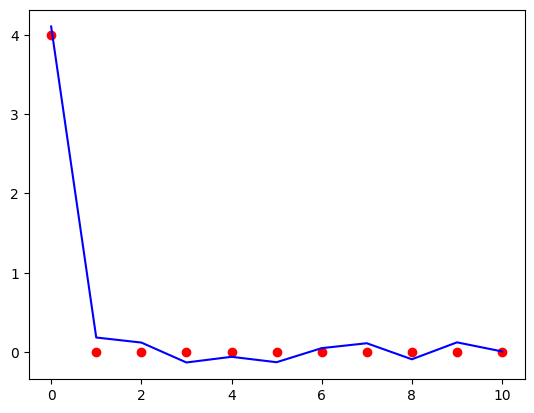

In [18]:
plt.plot(np.linspace(0,10,11), dataCov, c='b')
plt.scatter(0,4, c='r')
plt.scatter(np.linspace(1,10,10),np.zeros(10), c='r')

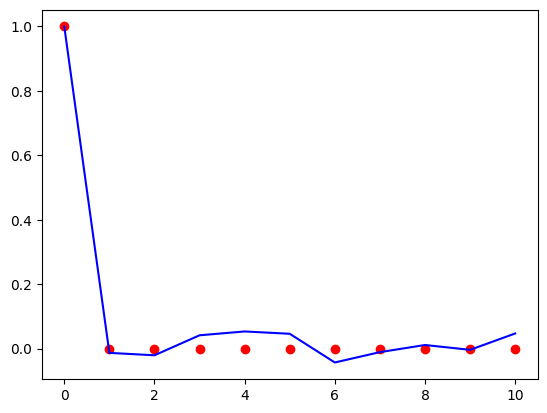

In [21]:
plt.plot(np.linspace(0,10,11), dataCorr, c='b')
plt.scatter(0,1, c='r')
plt.scatter(np.linspace(1,10,10),np.zeros(10), c='r')

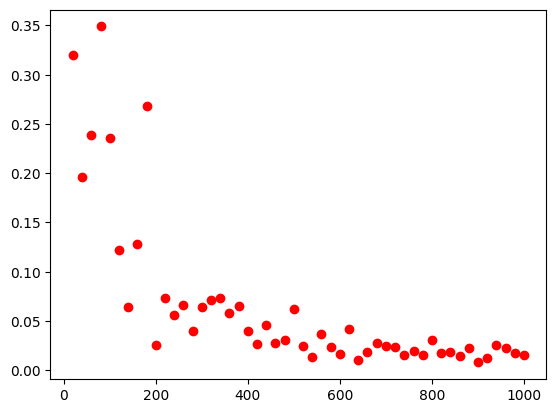

In [88]:
ns = np.arange(20,1001,20)
hs = np.linspace(0,10,11).astype(int)
meansCov = []
meansCorr = []
autocovList = np.array([4,0,0,0,0,0,0,0,0,0,0])
autocorrList = np.array([1,0,0,0,0,0,0,0,0,0,0])
for n in ns:
    xs = np.random.normal(0, 2, size = n)
    covs = []
    corrs = []
    for h in hs:
        covs.append(autocov(xs, h))
        corrs.append(autocorr(xs, h))
    meansCov.append(np.mean((covs-autocovList)**2))
    meansCorr.append(np.mean((corrs-autocorrList)**2))



plt.scatter(np.arange(20,1001,20), meansCov, c='r')    

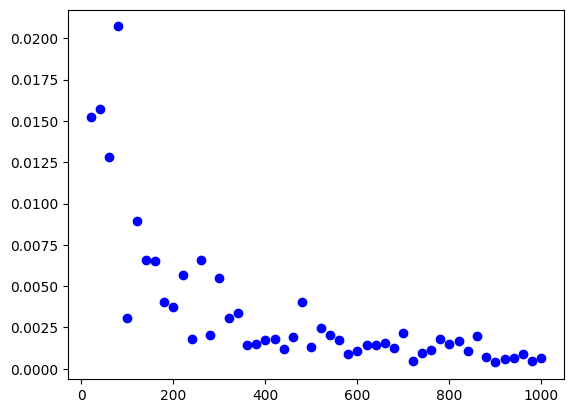

In [86]:
plt.scatter(np.arange(20,1001,20), valCorr, c='b')

### Zadanie 4

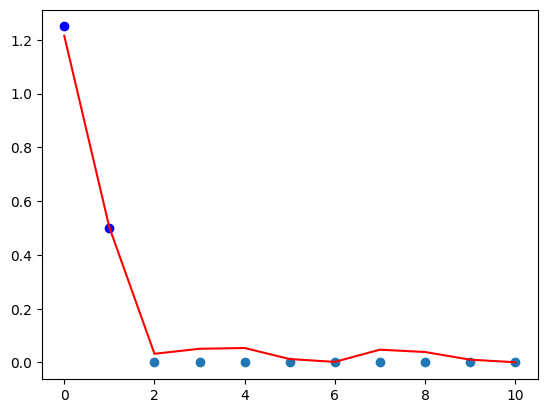

In [35]:
a = 2
sigma = 0.5
n = 1000

zs = np.random.normal(0, sigma, size=n+1)
xs = []
for i in range(1, n+1):
    xs.append(zs[i]+a*zs[i-1])
dataCov = []
dataCorr = []
for h in range(11):
    dataCov.append(autocov(xs, h))
    dataCorr.append(autocorr(xs, h))

plt.plot(np.arange(0,11,1),dataCov, c='r')
plt.scatter(0, sigma**2*(1+a**2), c='b')
plt.scatter(1, sigma**2*a, c='b')
plt.scatter(np.arange(2,11,1), np.zeros(9))


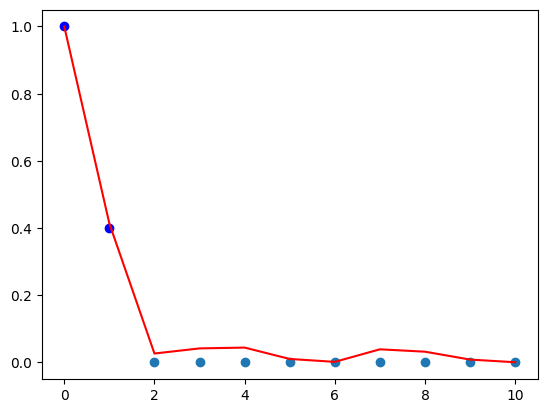

In [36]:
plt.plot(np.arange(0,11,1),dataCorr, c='r')
plt.scatter(0, 1, c='b')
plt.scatter(1, a/(1+a**2), c='b')
plt.scatter(np.arange(2,11,1), np.zeros(9))

### Zadanie 5

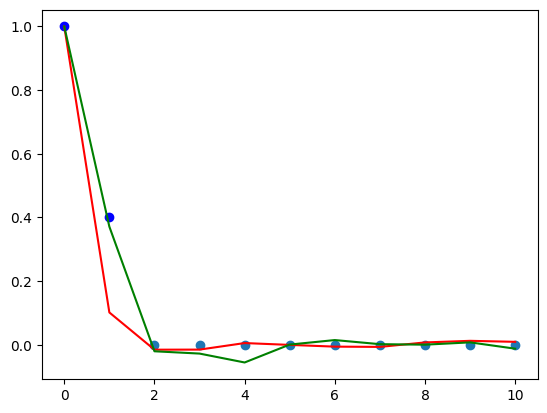

In [36]:
def roHat(xs, h):
    xMed = np.median(xs)
    val = 0
    for i in range(1, n-h):
        val += np.sign((xs[i]-xMed)*(xs[i+h]-xMed))
    return np.sin(np.pi/(2*(n-h))*val)

n = 5000
sigma = 0.5
theta = 2
p = 0.01
a = 20

zs = np.random.normal(0, sigma, size=n+1)
xs = []
for i in range(1, n+1):
    xs.append(zs[i]+theta*zs[i-1])

ksi = np.random.choice([a, -a, 0], size=n, p=[p/2, p/2, 1-p])
ys = xs + ksi

roCorrs = []
autoCorrs = []

for h in range(11):
    autoCorrs.append(autocorr(ys, h))
    roCorrs.append(roHat(ys, h))

plt.plot(np.linspace(0, 10, 11), autoCorrs, c='r')
plt.plot(np.linspace(0, 10, 11), roCorrs, c='green')
plt.scatter(0, 1, c='b')
plt.scatter(1, theta/(1+theta**2), c='b')
plt.scatter(np.arange(2,11,1), np.zeros(9))

In [72]:
ps = np.arange(0.01, 0.16, 0.01)
As = np.arange(1,11,1)
n = 1000
theta = 2
sigma = 0.5
M = 100
theo = theta/(1+theta**2)
h=1
zs = np.random.normal(0, sigma, size=n+1)
xs = []
for i in range(1, n+1):
    xs.append(zs[i]+theta*zs[i-1])

values = []
for p in ps:
    subvalues = []
    for a in As:
        subsubvalues = []
        for i in range(M):
            ksi = np.random.choice([a, -a, 0], size=n, p=[p/2, p/2, 1-p])
            ys = xs + ksi
            value = roHat(ys, 1)
            subsubvalues.append(np.abs(value-theo))
        subvalues.append(np.mean(subsubvalues))
    values.append(subvalues)

In [68]:
valuesMa = []
for p in ps:
    subvalues = []
    for a in As:
        subsubvalues = []
        for i in range(M):
            ksi = np.random.choice([a, -a, 0], size=n, p=[p/2, p/2, 1-p])
            ys = xs + ksi
            value = autocorr(ys, 1)
            subsubvalues.append(np.abs(value-theo))
        subvalues.append(np.mean(subsubvalues))
    valuesMa.append(subvalues)


<Axes: >

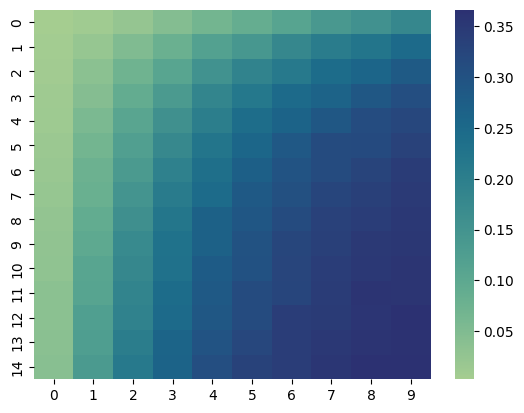

In [73]:
maxMa = max(max(valuesMa))
minMa = min(min(valuesMa))
sn.heatmap(valuesMa, cmap='crest', vmin=minMa, vmax=maxMa)

<Axes: >

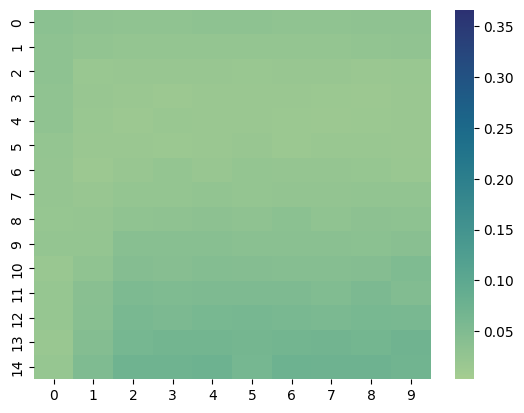

In [74]:
sn.heatmap(values, cmap='crest', vmin=minMa, vmax=maxMa)
